# Please ignore the below block of code.
Just a custom code block to run my tensorflow with gpu support.

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


# Code Starts Here

### Import Data

In [2]:
import pandas as pd

df = pd.read_csv("https://cocl.us/concrete_data")
df.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


### Check For Null Values

In [3]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64



Since there are no null values we can move forward with creating features and target vectors.

In [4]:
X = df.drop("Strength", axis=1)
y = df.loc[:, "Strength"]

X.shape, y.shape

((1030, 8), (1030,))

### Split the data in train and test

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

### Create the model

In [6]:
import tensorflow.keras as keras

In [7]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(10, activation="relu", input_shape=(X.shape[1],)))
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

In [8]:
model = build_model()

model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
23/23 [==============================] - 0s 2ms/step - loss: 3106.5081
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 1874.1129
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 1498.4380
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 1260.6569
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 1087.2555
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 951.2848
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 842.4612
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 749.5769
Epoch 9/50
23/23 [==============================] - 0s 2ms/step - loss: 677.1929
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 615.0200
Epoch 11/50
23/23 [==============================] - 0s 2ms/step - loss: 560.8834
Epoch 12/50
23/23 [==============================] - 0s 2ms/step - loss: 514.0228
Epoch 13/50
23/23 [=

### Calculating Mean Squared Error

In [9]:
from sklearn.metrics import mean_squared_error

predicted_y = model.predict(X_test)
mse = mean_squared_error(y_test, predicted_y)
print(f"Test MSE: {mse}")

Test MSE: 110.59738900322783


### Since we have to create a list of 50 MSEs putting everything in a function

In [10]:
def do_n_times(n=50):
    mse_list = []
    for index in range(n):
        # split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        
        # build model
        model = build_model()
        
        # train model
        model.fit(X_train, y_train, epochs=50, verbose=0)
        
        # predict test set
        predicted_y = model.predict(X_test)
        
        # get MSE for the model
        mse = mean_squared_error(y_test, predicted_y)
        print(f"MSE {index}: {mse}")
        
        # append to list
        mse_list.append(mse)
    return mse_list

In [11]:
mse_list = do_n_times(50)

MSE 0: 178.8232236568868
MSE 1: 118.86509400388924
MSE 2: 386.41268677935045
MSE 3: 277.29440954371324
MSE 4: 457.2025658118378
MSE 5: 248.52007639105904
MSE 6: 737.9459642119898
MSE 7: 191.95314236736647
MSE 8: 98.59145048875641
MSE 9: 117.39982676356219
MSE 10: 130.2313588718687
MSE 11: 235.1318890163688
MSE 12: 145.98215361371498
MSE 13: 99.98261314854807
MSE 14: 559.1448059853005
MSE 15: 135.46131727020452
MSE 16: 247.76872063955582
MSE 17: 140.78860065262154
MSE 18: 118.15926811122468
MSE 19: 237.2865379380346
MSE 20: 109.34168184597777
MSE 21: 184.3633397621543
MSE 22: 163.48730431880568
MSE 23: 396.1313218536554
MSE 24: 408.3563914974437
MSE 25: 318.4902309979478
MSE 26: 120.36756173479729
MSE 27: 118.13157316079864
MSE 28: 228.77900007249627
MSE 29: 119.33021043552739
MSE 30: 731.9668502992774
MSE 31: 199.01655916396726
MSE 32: 122.3141841835366
MSE 33: 289.1231297401104
MSE 34: 1142.8589865217004
MSE 35: 134.3896856699881
MSE 36: 144.01666685384558
MSE 37: 326.07121809109935
M

### Average and Standard Deviation of MSE

In [12]:
import numpy as np
print(f"Average of MSEs: {np.mean(mse_list)}")
print(f"Standard Deviation MSEs: {np.std(mse_list)}")


Average of MSEs: 295.9286608800206
Standard Deviation MSEs: 298.20449573361714


### Plot different MSEs

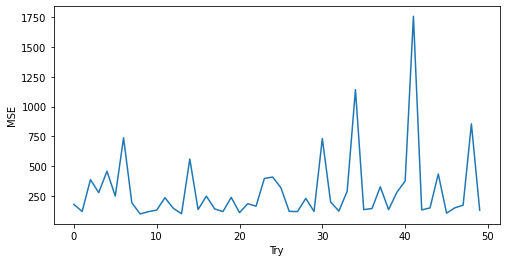

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(mse_list)
plt.xlabel("Try")
plt.ylabel("MSE")

plt.show()